# Consolidate AMULET outputs into a single doublet list
This script concatenates all the amulet outputs to a single file

In [10]:
import os
import glob
import pandas as pd

# Load new AMULET annotations from CellRanger

In [11]:
base_dir = "/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/results/sample_qc"
amulet_bc_paths = glob.glob(os.path.join(base_dir, "*", "atac/amulet/doublet_barcodes.txt"))
amulet_bc_paths[:5], len(amulet_bc_paths)

(['/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/results/sample_annotation/mo14/atac/amulet/doublet_barcodes.txt',
  '/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/results/sample_annotation/11-1/atac/amulet/doublet_barcodes.txt',
  '/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/results/sample_annotation/mo26/atac/amulet/doublet_barcodes.txt',
  '/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/results/sample_annotation/0-2/atac/amulet/doublet_barcodes.txt',
  '/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/results/sample_annotation/dm25a/atac/amulet/doublet_barcodes.txt'],
 48)

In [12]:
# Concat
amulet_bcs = []
num_doublets = {}
for path in amulet_bc_paths:
    sample = path.split("/")[-4]
    curr_bcs = pd.read_csv(path, sep="\t", header=None)[0].tolist()
    curr_bcs = [sample + "#" + bc for bc in curr_bcs]
    num_doublets[sample] = len(curr_bcs)
    amulet_bcs.extend(curr_bcs)
amulet_bcs[:5], len(amulet_bcs)

(['mo14#AAACCGCGTTTGTCTA-1',
  'mo14#AAACGCGCACAATTAC-1',
  'mo14#AAAGGAGCATTAAGTC-1',
  'mo14#AAAGGCTCAAGGACCA-1',
  'mo14#AAAGGTTAGCTAAGTC-1'],
 25023)

# Write

In [13]:
# Print total number of samples with doublets
len(num_doublets)

48

In [15]:
# Average per sample
avg_doublets = sum(num_doublets.values()) / len(num_doublets)
avg_doublets

521.3125

In [16]:
with open("/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/results/3_sample_qc/amulet_bcs.txt", "w") as f:
    f.write("\n".join(amulet_bcs))

In [17]:
# Save number of doublets per sample
pd.Series(num_doublets).to_csv("/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/results/3_sample_qc/num_doublets_per_sample.csv")

# Load previous AMULET annotations from Mei
These were transferred from the Gaulton lab server from one of Mei's early runs of AMULET
These were compared to CellCommander calls and matched up very well, though not perfectly: /cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/bin/data_exploration/scATACseq/2023_10_23_amulet_sanity_checks.ipynb

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load previous AMULET annotations from Mei
previous_dir = "/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/archive/annotation/previous/2023_10_04/amulet"
amulet_bc_paths = glob.glob(os.path.join(previous_dir, "*", "MultipletBarcodes_01.txt"))
amulet_bc_paths[:5], len(amulet_bc_paths)

(['/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/archive/annotation/previous/2023_10_04/amulet/igvf_dm35a_deep/MultipletBarcodes_01.txt',
  '/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/archive/annotation/previous/2023_10_04/amulet/igvf_dm23a_deep/MultipletBarcodes_01.txt',
  '/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/archive/annotation/previous/2023_10_04/amulet/igvf_mo26_deep/MultipletBarcodes_01.txt',
  '/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/archive/annotation/previous/2023_10_04/amulet/igvf_dm34a_deep/MultipletBarcodes_01.txt',
  '/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/archive/annotation/previous/2023_10_04/amulet/igvf_mo3_deep/MultipletBarcodes_01.txt'],
 27)

In [9]:
# Concat
prev_amulet_bcs = []
prev_num_doublets = {}
for path in amulet_bc_paths:
    sample = path.split("/")[-2].split("_")[1]
    curr_bcs = pd.read_csv(path, sep="\t", header=None)[0].tolist()
    curr_bcs = [sample + "#" + bc for bc in curr_bcs]
    prev_num_doublets[sample] = len(curr_bcs)
    prev_amulet_bcs.extend(curr_bcs)
prev_amulet_bcs[:5], len(prev_amulet_bcs)

(['dm35a#GGCTAGTGTTCCGGCT-1',
  'dm35a#GCTGCACAGCAACATC-1',
  'dm35a#GCTGCACAGGGTTATC-1',
  'dm35a#ATGTTCAAGGTGCTGC-1',
  'dm35a#TGACCAAGTGTCCAGG-1'],
 14122)

In [10]:
# Make a dataframe with rows for each sample and columns for num cells and num doublets for meis and my doublet calling
num_df = pd.DataFrame()
num_df["sample"] = list(num_doublets.keys())
num_df["num_doublets"] = list(num_doublets.values())
for sample in prev_num_doublets:
    num_df.loc[num_df["sample"] == sample, "num_doublets_mei"] = prev_num_doublets[sample]

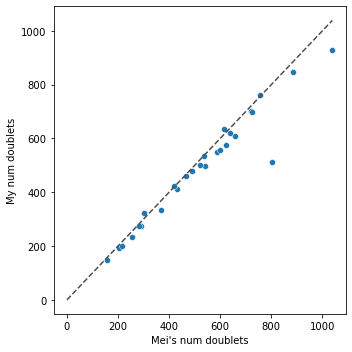

In [11]:
# Plot scatterplots on same fig for both num_cells and num_doublets against each other
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.scatterplot(x="num_doublets_mei", y="num_doublets", data=num_df, ax=ax)
ax.set_xlabel("Mei's num doublets")
ax.set_ylabel("My num doublets")
ax.plot([0, num_df["num_doublets_mei"].max()], [0, num_df["num_doublets_mei"].max()], ls="--", c=".3")
plt.tight_layout()

In [12]:
# Venn diagram of doublets
from matplotlib_venn import venn2

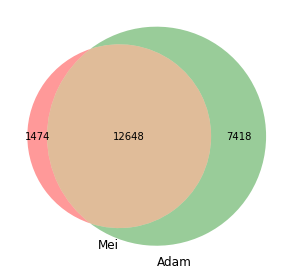

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
venn2([set(prev_amulet_bcs), set(amulet_bcs)], set_labels=("Mei", "Adam"))

# DONE!

---